In [2]:
# keep this function handy for all network visualizations in all chapters

import networkx as nx
import numpy as np
from IPython.display import SVG
from sknetwork.visualization import svg_graph
from sknetwork.data import Bunch
import pandas as pd
from tqdm import tqdm
from newspaper import Article
import time
import spacy
import scipy.sparse as sp


def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):
    if not isinstance(G, nx.Graph):
        raise ValueError("Input graph must be a NetworkX Graph object.")

    adjacency = nx.to_numpy_array(G, nodelist=None, dtype=None, order=None, multigraph_weight=sum, weight='weight', nonedge=0.0)
    adjacency = sp.csr_matrix(adjacency)
    #adjacency = nx.to_numpy_array(G, weight='weight', multigraph_weight=sum)
    names = np.array(list(G.nodes()))
    print(names)
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = names

    if show_names and 'names' not in graph:
        raise ValueError("Graph must have node names if show_names is True.")

    image = svg_graph(
        graph.adjacency,  # Remove unused pagerank scores
        edge_width=edge_width,
        display_node_weight=True,
        node_size=node_size,
        font_size=font_size,
        names=graph.names if show_names else None,
        width=1024,
        height=1024,
        margin=0,
        scale=1.0,
        node_color="lightblue",
        edge_color="black",
        filename=None,
        directed=False

    )

    return SVG(image)

In [3]:
import networkx as nx 
 
G = nx.les_miserables_graph() 

In [4]:
df = nx.to_pandas_edgelist(G)[['source', 'target']] 

G = nx.from_pandas_edgelist(df) 

['Napoleon' 'Myriel' 'MlleBaptistine' 'MmeMagloire' 'CountessDeLo'
 'Geborand' 'Champtercier' 'Cravatte' 'Count' 'OldMan' 'Valjean' 'Labarre'
 'Marguerite' 'MmeDeR' 'Isabeau' 'Gervais' 'Fantine' 'MmeThenardier'
 'Thenardier' 'Cosette' 'Javert' 'Fauchelevent' 'Bamatabois' 'Simplice'
 'Scaufflaire' 'Woman1' 'Judge' 'Champmathieu' 'Brevet' 'Chenildieu'
 'Cochepaille' 'Woman2' 'MotherInnocent' 'Gavroche' 'Gillenormand'
 'MlleGillenormand' 'Marius' 'Enjolras' 'Bossuet' 'Gueulemer' 'Babet'
 'Claquesous' 'Montparnasse' 'Toussaint' 'Listolier' 'Tholomyes' 'Fameuil'
 'Blacheville' 'Favourite' 'Dahlia' 'Zephine' 'Perpetue' 'Eponine'
 'Anzelma' 'Magnon' 'Pontmercy' 'Boulatruelle' 'Brujon' 'LtGillenormand'
 'Gribier' 'MmePontmercy' 'Mabeuf' 'Courfeyrac' 'MmeBurgon' 'Jondrette'
 'Combeferre' 'Prouvaire' 'Feuilly' 'Bahorel' 'Joly' 'Grantaire' 'Child1'
 'Child2' 'MmeHucheloup' 'BaronessT' 'MlleVaubois' 'MotherPlutarch']


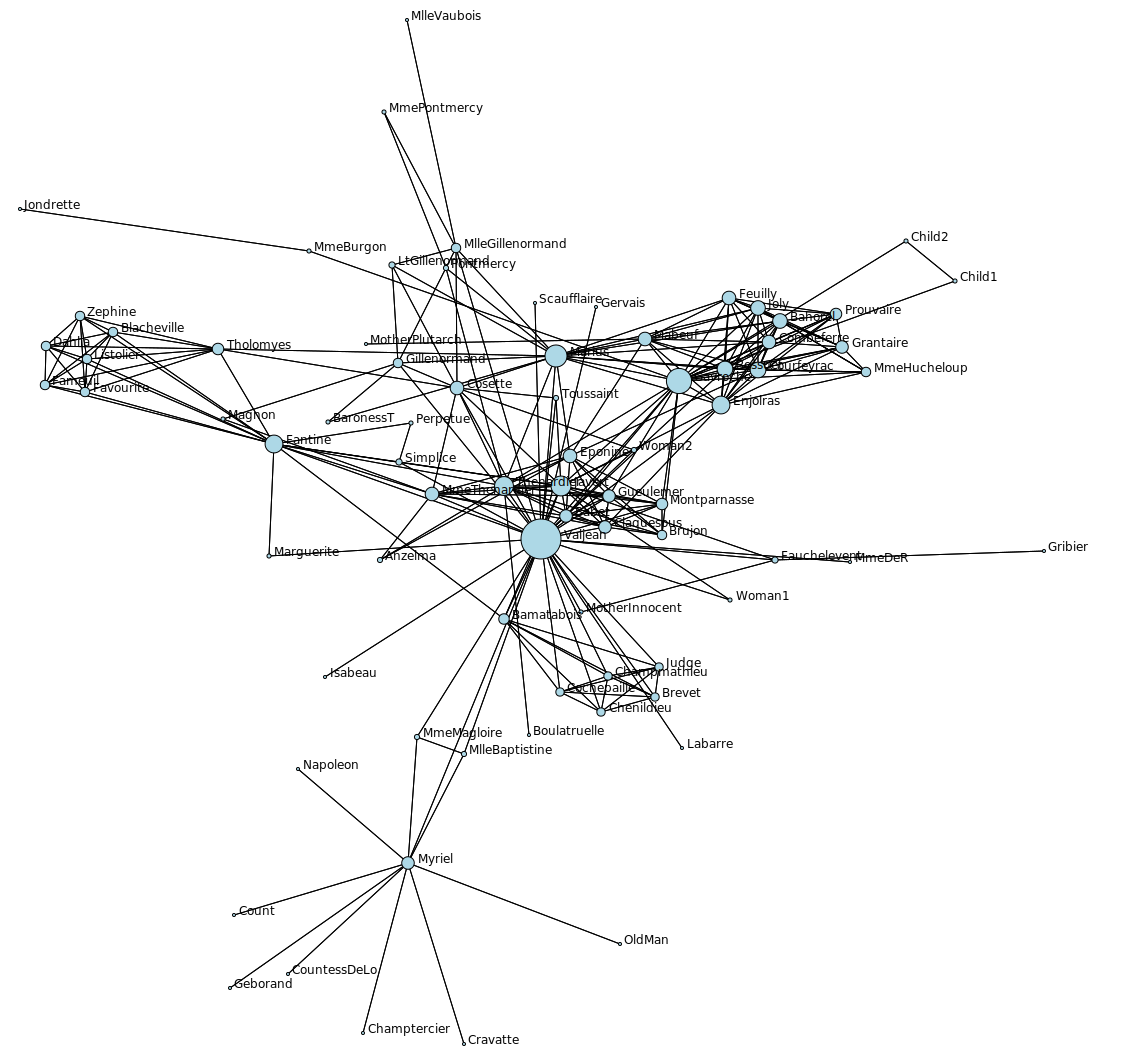

In [5]:
draw_graph(G, font_size=12, show_names=True, node_size=4, edge_width=1) 

['Myriel' 'MlleBaptistine' 'MmeMagloire' 'Valjean' 'Marguerite' 'Fantine'
 'MmeThenardier' 'Thenardier' 'Cosette' 'Javert' 'Fauchelevent'
 'Bamatabois' 'Simplice' 'Woman1' 'Judge' 'Champmathieu' 'Brevet'
 'Chenildieu' 'Cochepaille' 'Woman2' 'MotherInnocent' 'Gavroche'
 'Gillenormand' 'MlleGillenormand' 'Marius' 'Enjolras' 'Bossuet'
 'Gueulemer' 'Babet' 'Claquesous' 'Montparnasse' 'Toussaint' 'Listolier'
 'Tholomyes' 'Fameuil' 'Blacheville' 'Favourite' 'Dahlia' 'Zephine'
 'Perpetue' 'Eponine' 'Anzelma' 'Magnon' 'Pontmercy' 'Brujon'
 'LtGillenormand' 'MmePontmercy' 'Mabeuf' 'Courfeyrac' 'Combeferre'
 'Prouvaire' 'Feuilly' 'Bahorel' 'Joly' 'Grantaire' 'Child1' 'Child2'
 'MmeHucheloup' 'BaronessT']


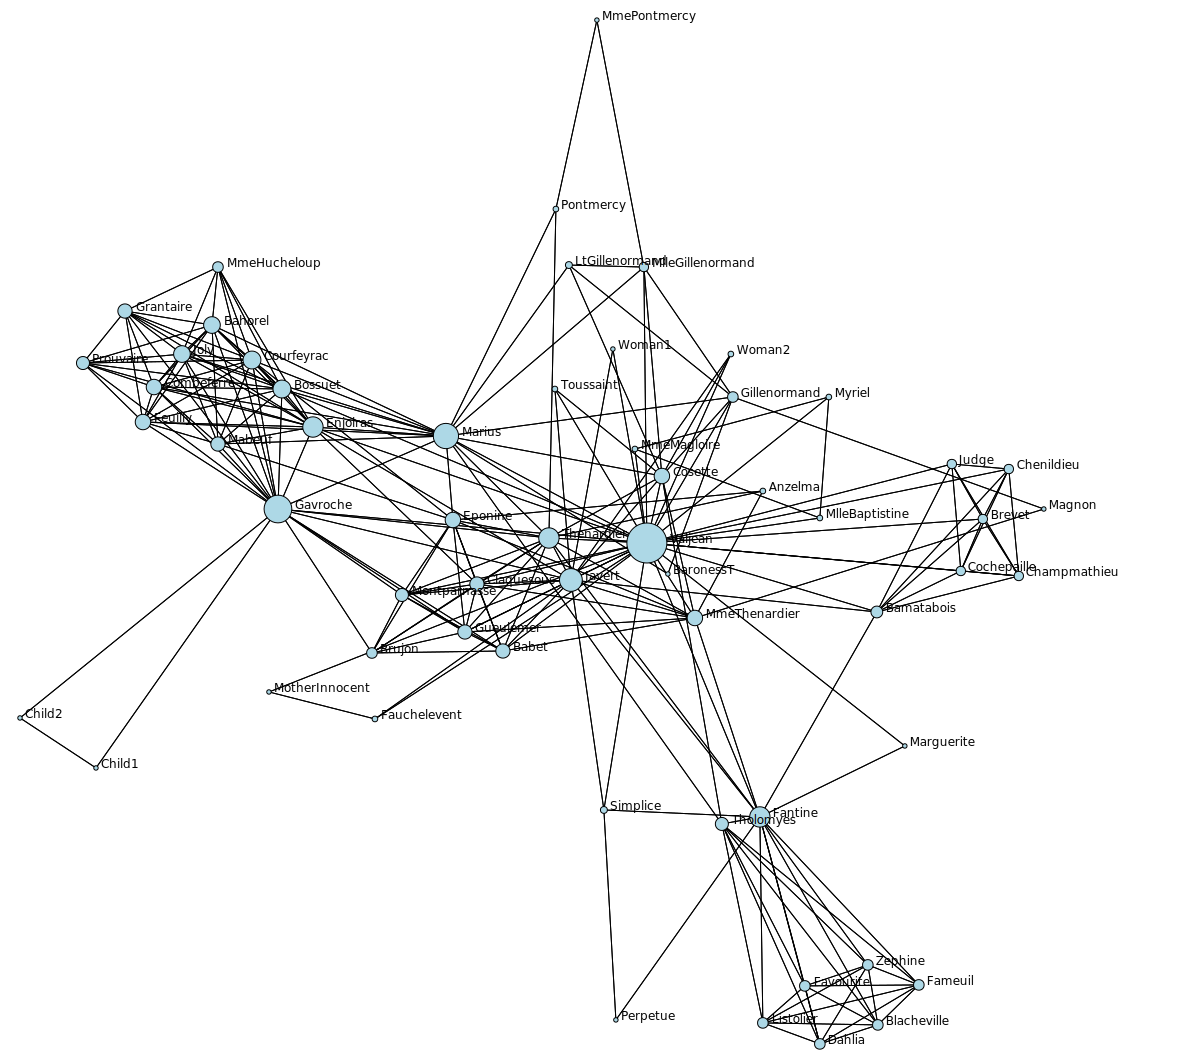

In [6]:
draw_graph(nx.k_core(G, 2), font_size=12, show_names=True, node_size=4, edge_width=1) 

In [7]:
import pandas as pd 
 
pagerank = nx.pagerank(G) 
pagerank_df = pd.DataFrame(pagerank, index=[0]).T 
pagerank_df.columns = ['pagerank'] 
pagerank_df.sort_values('pagerank', inplace=True, ascending=False) 
pagerank_df.head(20) 

,pagerank
Valjean,0.075434
Myriel,0.042803
Gavroche,0.035764
Marius,0.030893
Javert,0.030303
Thenardier,0.027926
Fantine,0.027022
Enjolras,0.021880
Cosette,0.020611
MmeThenardier,0.019501


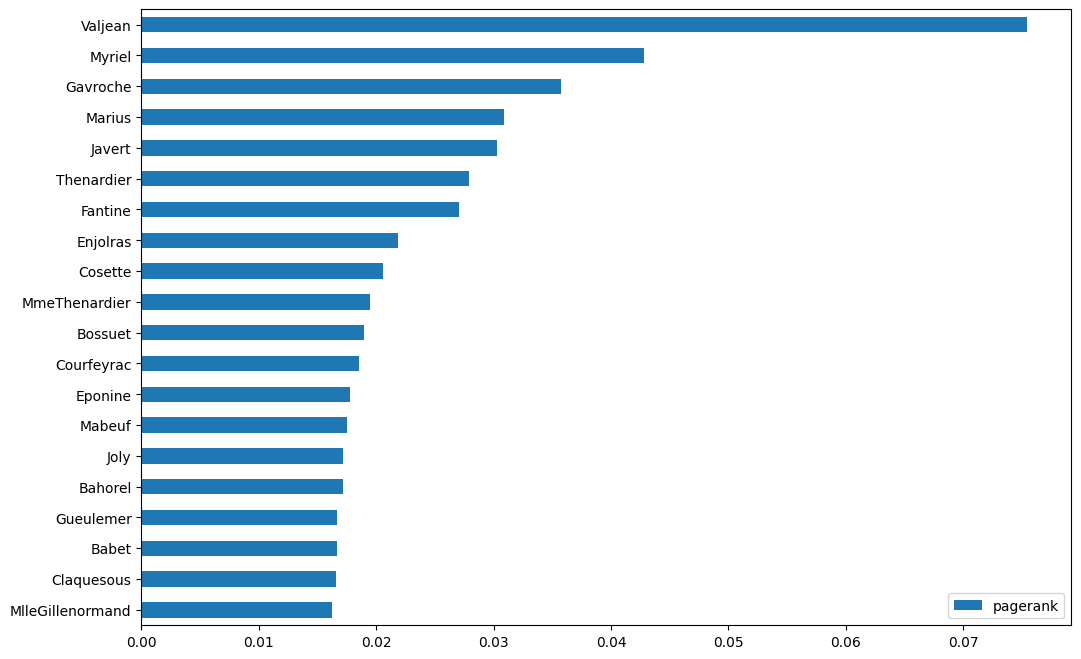

In [8]:
pagerank_df.head(20).plot.barh(figsize=(12,8)).invert_yaxis() 

In [9]:
ego_1 = nx.ego_graph(G, 'Valjean') 

['Judge' 'Woman2' 'MmeDeR' 'Woman1' 'Champmathieu' 'Isabeau' 'Valjean'
 'Myriel' 'Toussaint' 'MmeThenardier' 'Scaufflaire' 'Gueulemer'
 'Montparnasse' 'Cochepaille' 'Claquesous' 'Marguerite' 'Labarre'
 'Cosette' 'Marius' 'Gavroche' 'Enjolras' 'Thenardier' 'Simplice'
 'Chenildieu' 'Gillenormand' 'MotherInnocent' 'Gervais' 'MlleBaptistine'
 'Brevet' 'Javert' 'Fauchelevent' 'Bossuet' 'Babet' 'MmeMagloire'
 'Bamatabois' 'Fantine' 'MlleGillenormand']


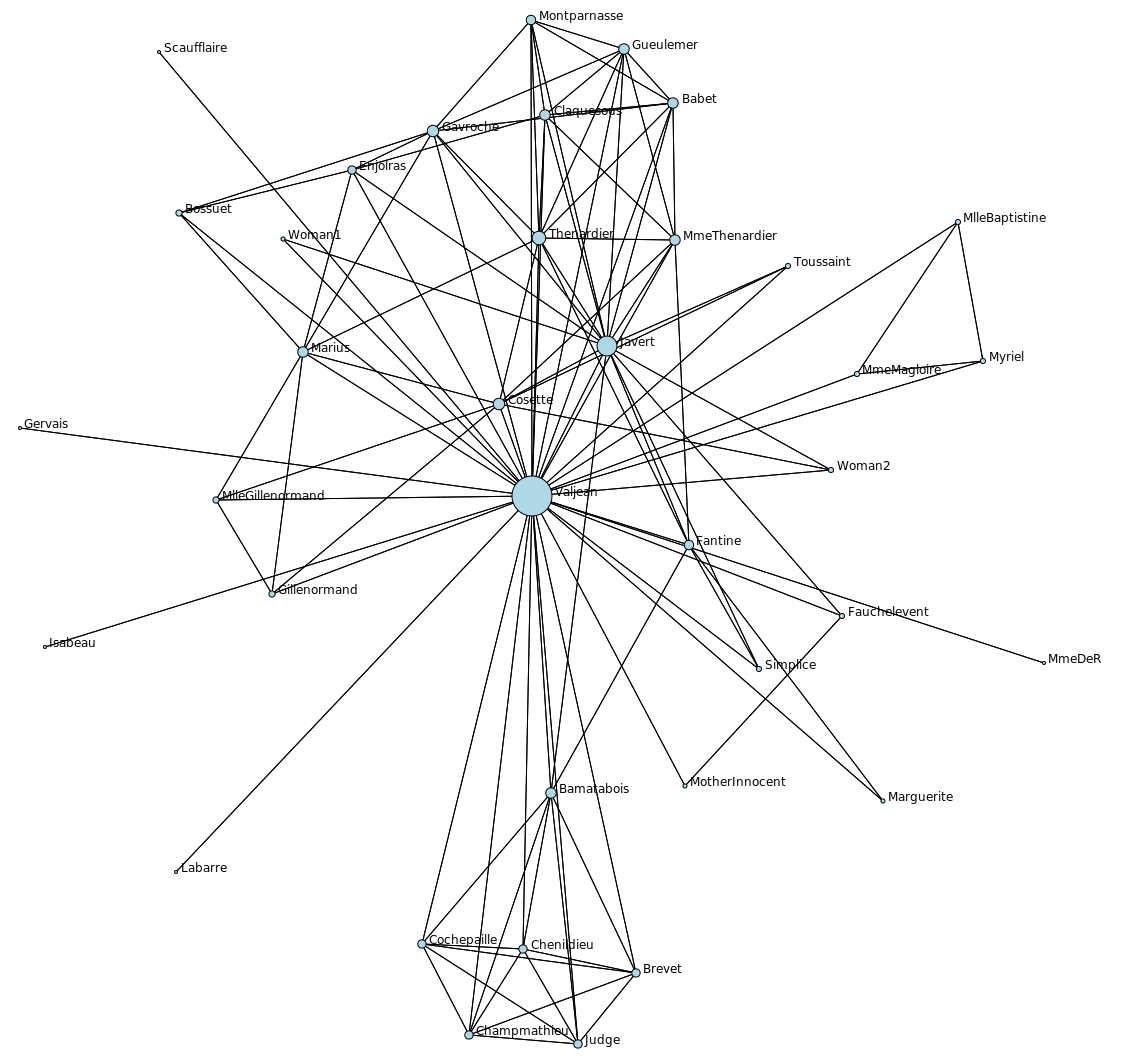

In [10]:
draw_graph(ego_1, font_size=12, show_names=True, node_size=4, edge_width=1) 

In [11]:
ego_1 = nx.ego_graph(G, 'Valjean', center=False) 

['Judge' 'Woman2' 'MmeDeR' 'Woman1' 'Champmathieu' 'Isabeau' 'Myriel'
 'Toussaint' 'MmeThenardier' 'Scaufflaire' 'Gueulemer' 'Montparnasse'
 'Cochepaille' 'Claquesous' 'Marguerite' 'Labarre' 'Cosette' 'Marius'
 'Gavroche' 'Enjolras' 'Thenardier' 'Simplice' 'Chenildieu' 'Gillenormand'
 'MotherInnocent' 'Gervais' 'MlleBaptistine' 'Brevet' 'Javert'
 'Fauchelevent' 'Bossuet' 'Babet' 'MmeMagloire' 'Bamatabois' 'Fantine'
 'MlleGillenormand']


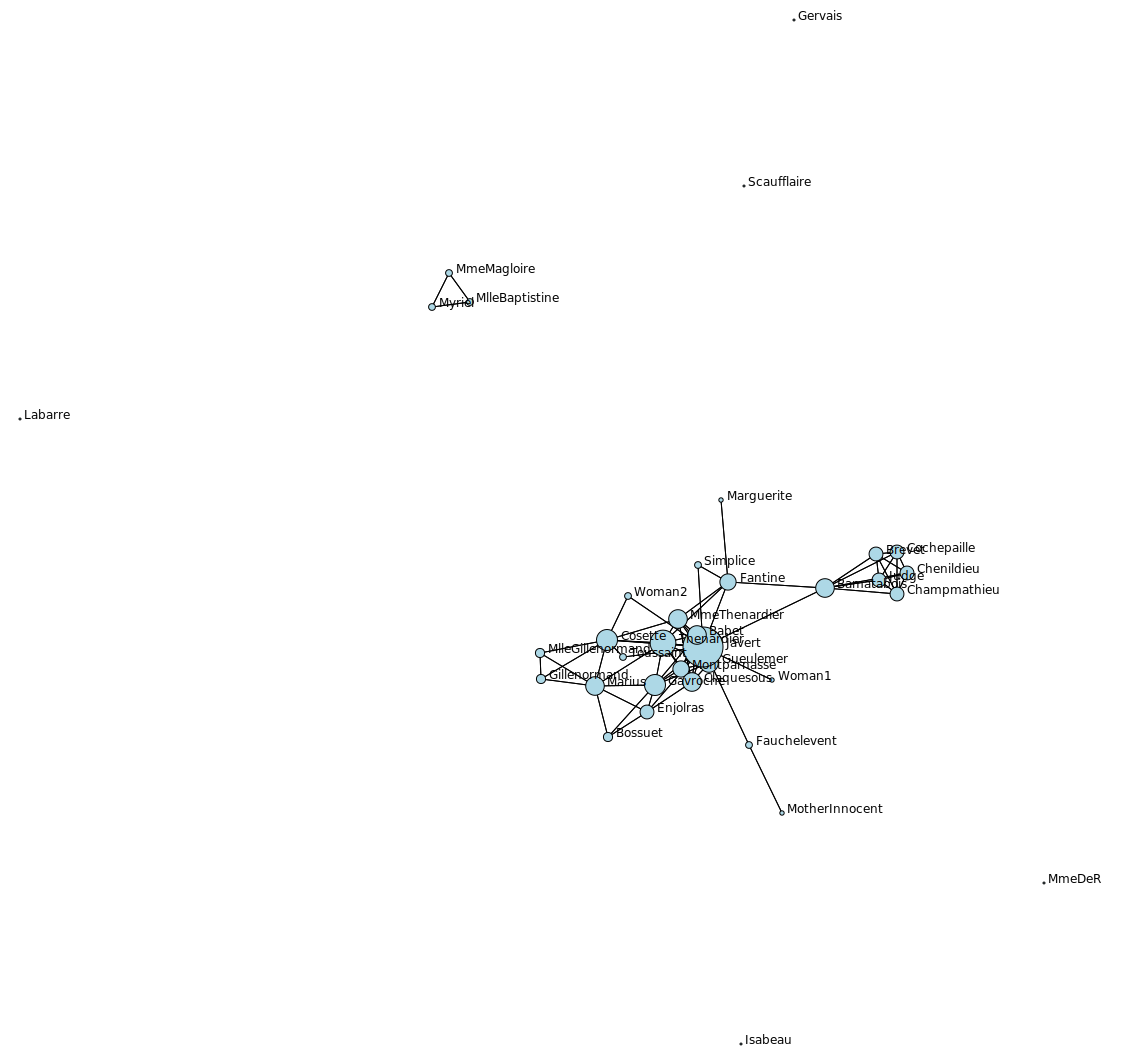

In [12]:
draw_graph(ego_1, font_size=12, show_names=True, node_size=4, edge_width=1) 

['Judge' 'Woman2' 'Woman1' 'Champmathieu' 'Myriel' 'Toussaint'
 'MmeThenardier' 'Gueulemer' 'Montparnasse' 'Cochepaille' 'Claquesous'
 'Marguerite' 'Cosette' 'Marius' 'Gavroche' 'Enjolras' 'Thenardier'
 'Simplice' 'Chenildieu' 'Gillenormand' 'MotherInnocent' 'MlleBaptistine'
 'Brevet' 'Javert' 'Fauchelevent' 'Bossuet' 'Babet' 'MmeMagloire'
 'Bamatabois' 'Fantine' 'MlleGillenormand']


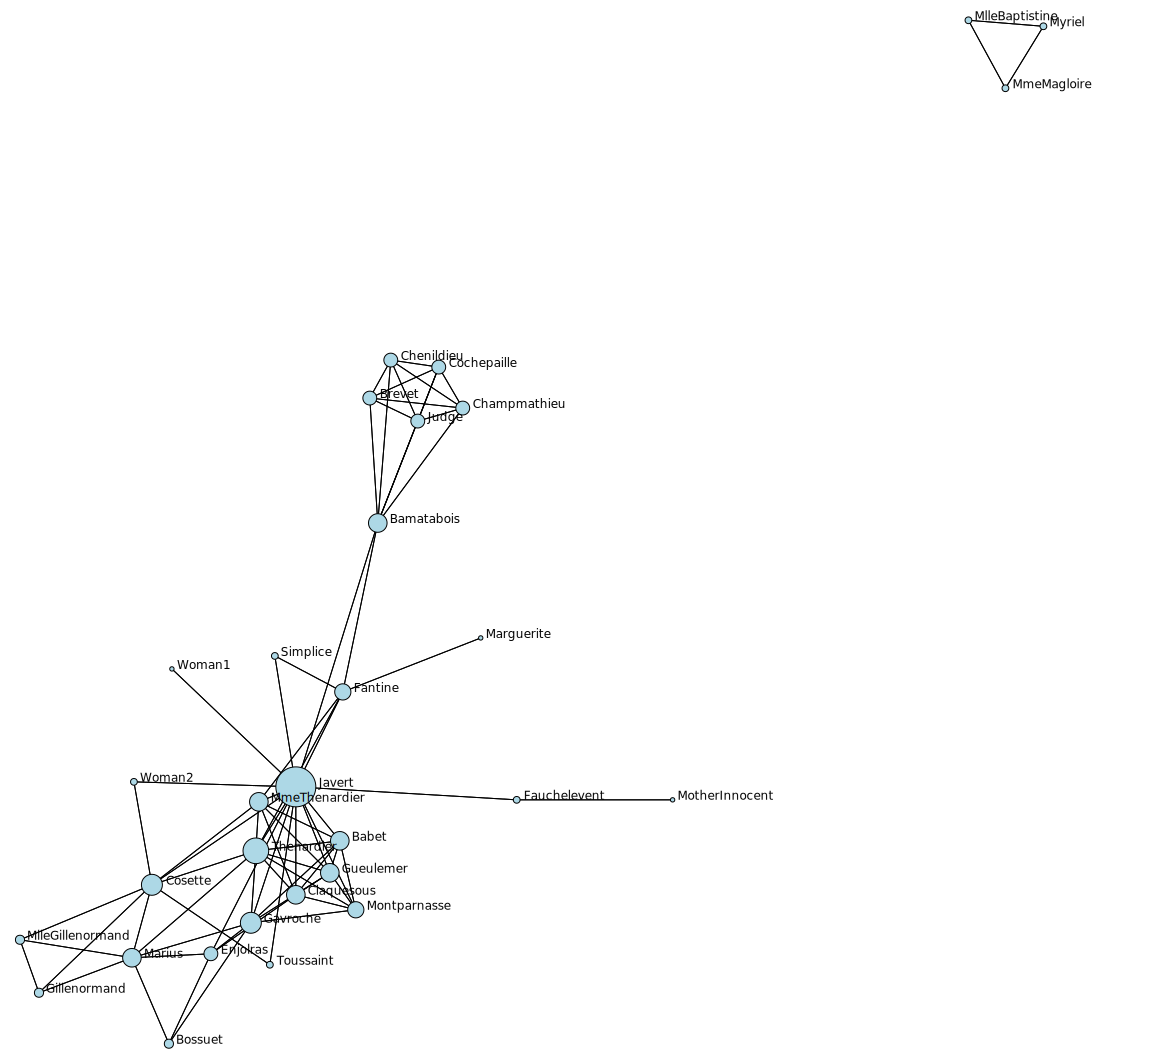

In [13]:
draw_graph(nx.k_core(ego_1, 1), font_size=12, show_names=True, node_size=4, edge_width=1) 

In [14]:
sorted(ego_1.nodes) 

['Babet',
 'Bamatabois',
 'Bossuet',
 'Brevet',
 'Champmathieu',
 'Chenildieu',
 'Claquesous',
 'Cochepaille',
 'Cosette',
 'Enjolras',
 'Fantine',
 'Fauchelevent',
 'Gavroche',
 'Gervais',
 'Gillenormand',
 'Gueulemer',
 'Isabeau',
 'Javert',
 'Judge',
 'Labarre',
 'Marguerite',
 'Marius',
 'MlleBaptistine',
 'MlleGillenormand',
 'MmeDeR',
 'MmeMagloire',
 'MmeThenardier',
 'Montparnasse',
 'MotherInnocent',
 'Myriel',
 'Scaufflaire',
 'Simplice',
 'Thenardier',
 'Toussaint',
 'Woman1',
 'Woman2']

In [15]:
len(ego_1.nodes) 

36

In [16]:
print(ego_1) 

Graph with 36 nodes and 76 edges


In [17]:
degcent = nx.degree_centrality(ego_1) 
degcent_df = pd.DataFrame(degcent, index=[0]).T 
degcent_df.columns = ['degree_centrality'] 
degcent_df.sort_values('degree_centrality', inplace=True, ascending=False) 
degcent_df.head(10) 

,degree_centrality
Javert,0.457143
Thenardier,0.285714
Gavroche,0.228571
Cosette,0.228571
Bamatabois,0.200000
Babet,0.200000
MmeThenardier,0.200000
Gueulemer,0.200000
Claquesous,0.200000
Marius,0.200000


In [18]:
nx.density(ego_1) 

0.12063492063492064

['Mabeuf' 'Bahorel' 'Courfeyrac' 'Valjean' 'Tholomyes' 'BaronessT'
 'Feuilly' 'Joly' 'Eponine' 'Cosette' 'Marius' 'Gavroche' 'Thenardier'
 'Pontmercy' 'Gillenormand' 'Combeferre' 'LtGillenormand' 'Bossuet'
 'Enjolras' 'MlleGillenormand']


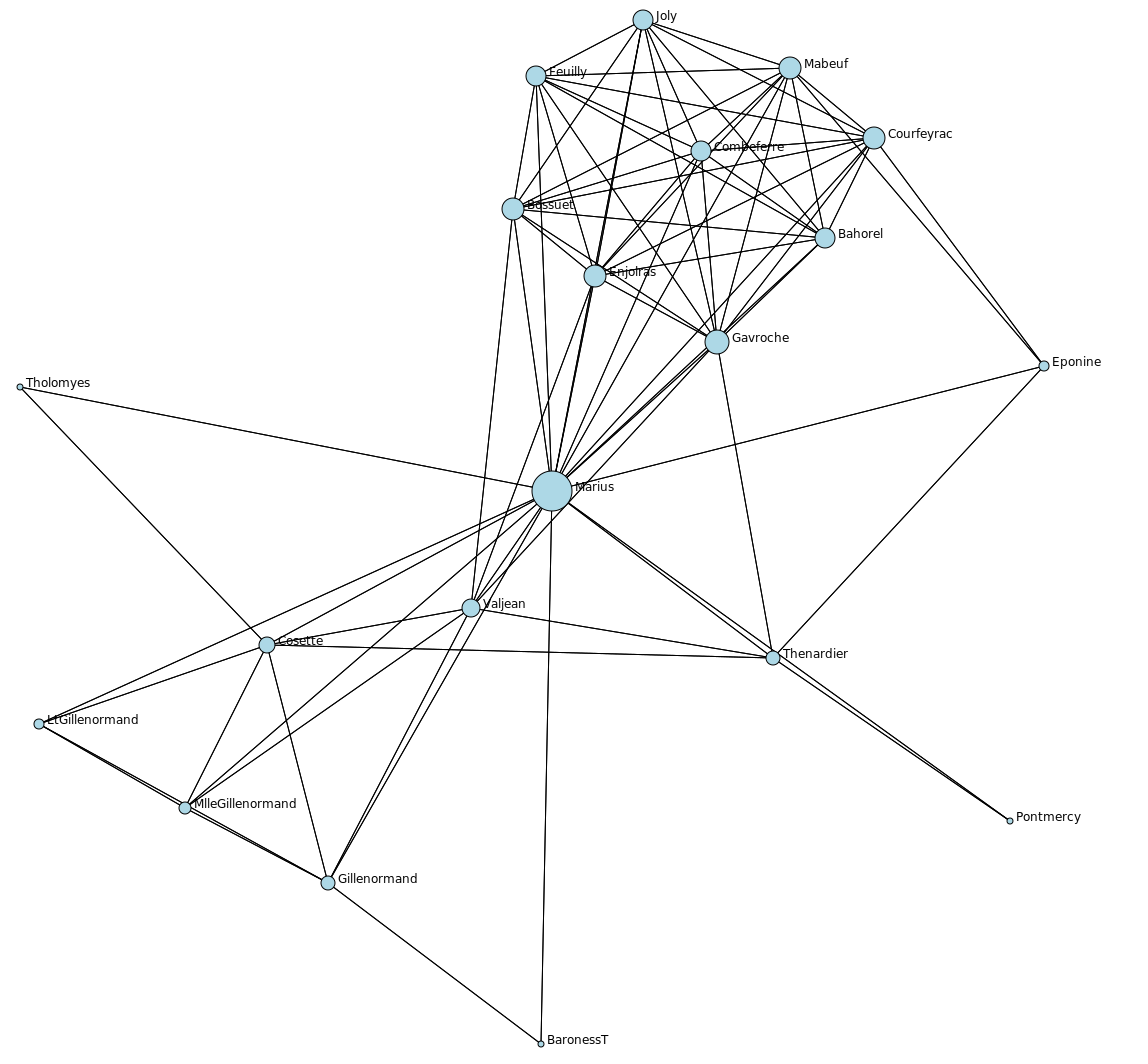

In [19]:
ego_2 = nx.ego_graph(G, 'Marius') 

draw_graph(ego_2, font_size=12, show_names=True, node_size=4, edge_width=1) 

['Mabeuf' 'Bahorel' 'Courfeyrac' 'Valjean' 'Tholomyes' 'BaronessT'
 'Feuilly' 'Joly' 'Eponine' 'Cosette' 'Gavroche' 'Thenardier' 'Pontmercy'
 'Gillenormand' 'Combeferre' 'LtGillenormand' 'Bossuet' 'Enjolras'
 'MlleGillenormand']


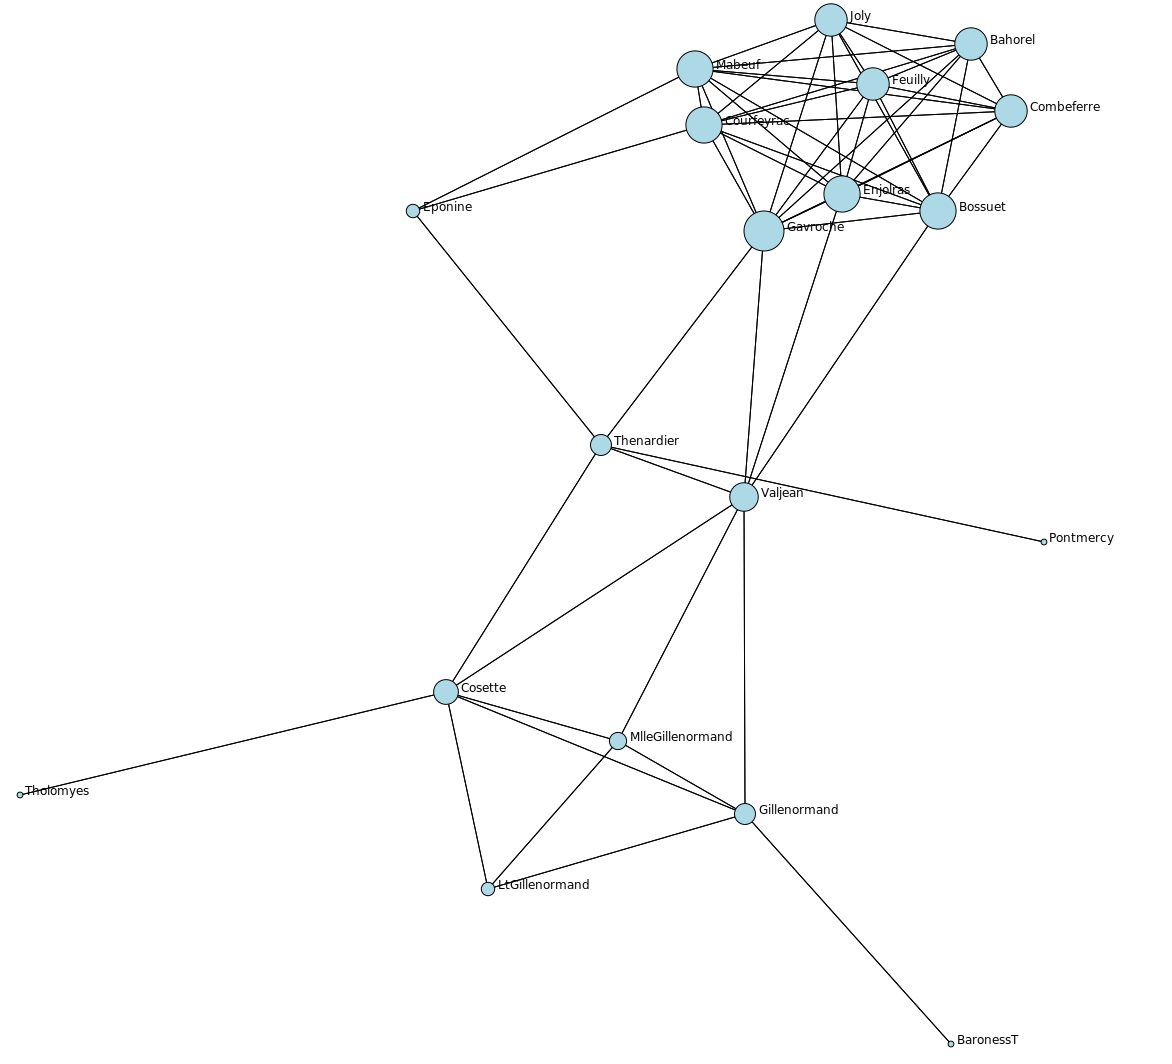

In [20]:
ego_2 = nx.ego_graph(G, 'Marius', center=False) 

draw_graph(ego_2, font_size=12, show_names=True, node_size=4, edge_width=1) 

In [21]:
sorted(ego_2.nodes) 

['Bahorel',
 'BaronessT',
 'Bossuet',
 'Combeferre',
 'Cosette',
 'Courfeyrac',
 'Enjolras',
 'Eponine',
 'Feuilly',
 'Gavroche',
 'Gillenormand',
 'Joly',
 'LtGillenormand',
 'Mabeuf',
 'MlleGillenormand',
 'Pontmercy',
 'Thenardier',
 'Tholomyes',
 'Valjean']

In [22]:
print(ego_2) 

Graph with 19 nodes and 57 edges


In [23]:
degcent = nx.degree_centrality(ego_2) 
degcent_df = pd.DataFrame(degcent, index=[0]).T 
degcent_df.columns = ['degree_centrality'] 
degcent_df.sort_values('degree_centrality', inplace=True, ascending=False) 
degcent_df.head(10) 

,degree_centrality
Gavroche,0.555556
Mabeuf,0.500000
Courfeyrac,0.500000
Enjolras,0.500000
Bossuet,0.500000
Feuilly,0.444444
Joly,0.444444
Combeferre,0.444444
Bahorel,0.444444
Valjean,0.388889


In [24]:
nx.density(ego_2) 

0.3333333333333333

['Mabeuf' 'Bahorel' 'Prouvaire' 'Courfeyrac' 'Brujon' 'Child1' 'Valjean'
 'Child2' 'Gueulemer' 'Montparnasse' 'Joly' 'Feuilly' 'Marius' 'Gavroche'
 'Thenardier' 'MmeHucheloup' 'Combeferre' 'MmeBurgon' 'Javert' 'Bossuet'
 'Babet' 'Grantaire' 'Enjolras']


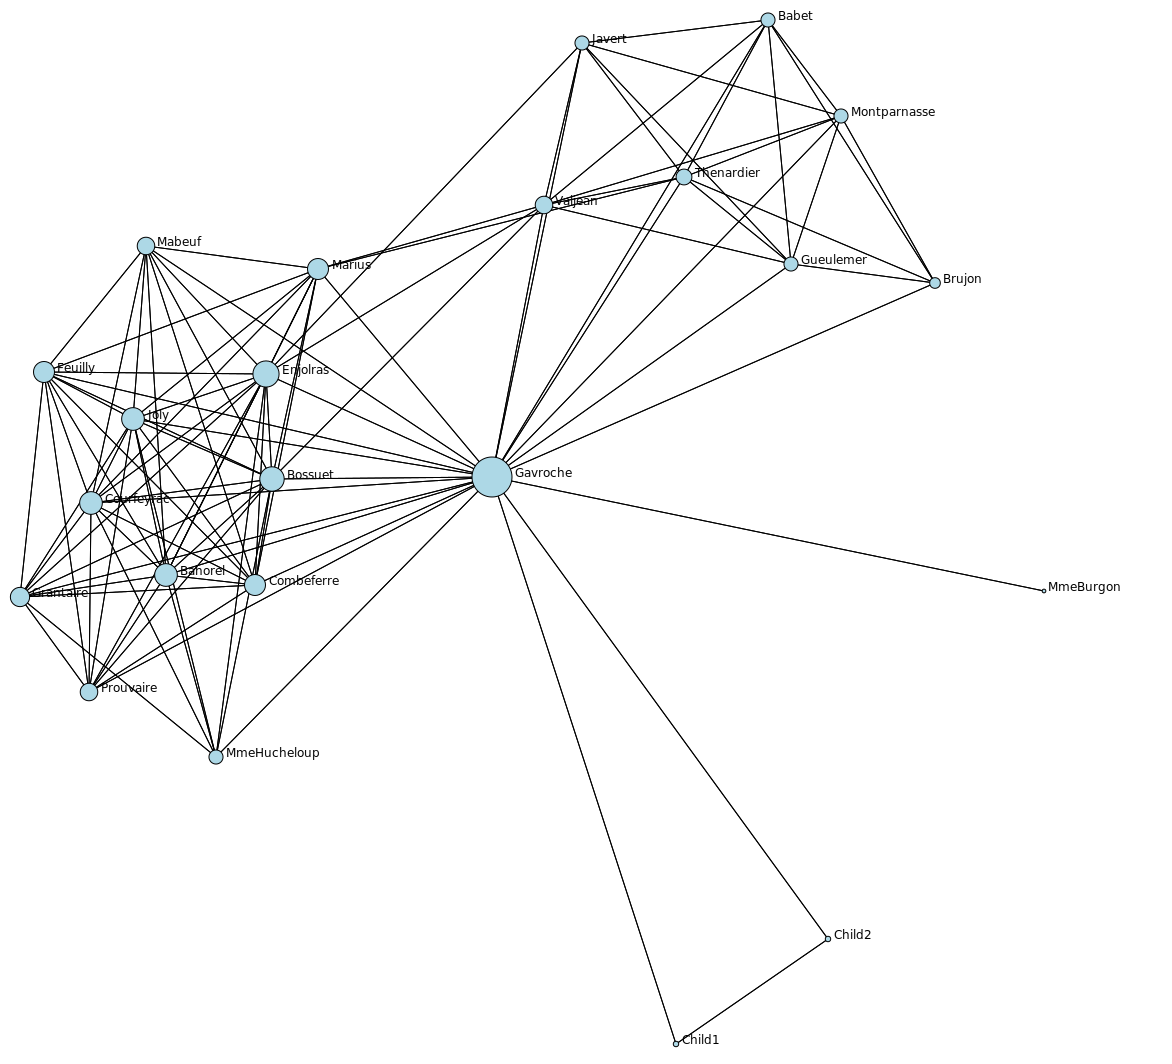

In [25]:
ego_3 = nx.ego_graph(G, 'Gavroche') 

draw_graph(ego_3, font_size=12, show_names=True, node_size=4, edge_width=1) 

['Mabeuf' 'Bahorel' 'Prouvaire' 'Courfeyrac' 'Brujon' 'Child1' 'Valjean'
 'Child2' 'Gueulemer' 'Montparnasse' 'Joly' 'Feuilly' 'Marius'
 'Thenardier' 'MmeHucheloup' 'Combeferre' 'MmeBurgon' 'Javert' 'Bossuet'
 'Babet' 'Grantaire' 'Enjolras']


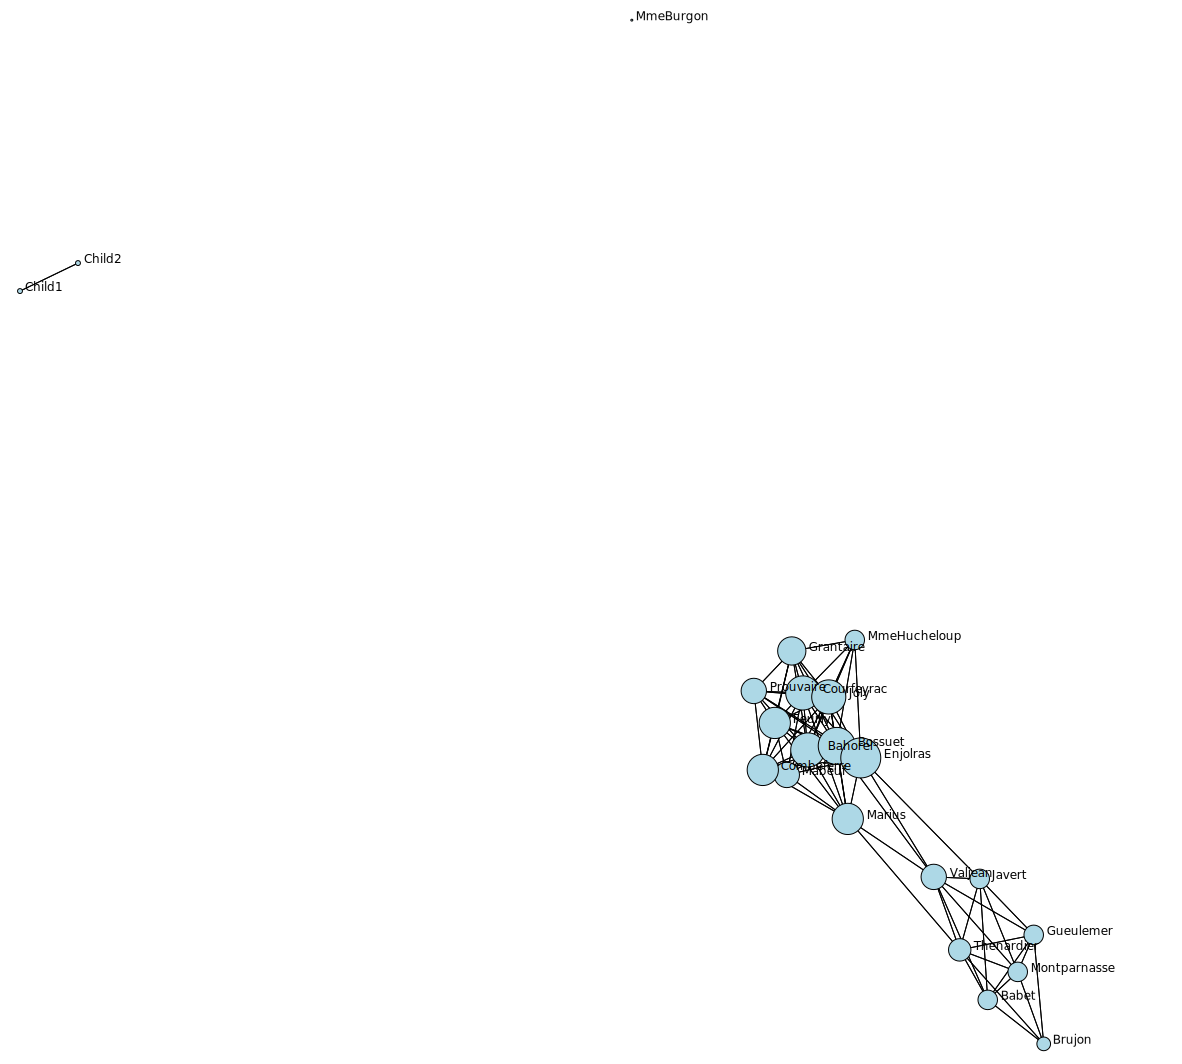

In [26]:
ego_3 = nx.ego_graph(G, 'Gavroche', center=False) 

draw_graph(ego_3, font_size=12, show_names=True, node_size=4, edge_width=1) 

In [27]:
sorted(ego_3.nodes) 

['Babet',
 'Bahorel',
 'Bossuet',
 'Brujon',
 'Child1',
 'Child2',
 'Combeferre',
 'Courfeyrac',
 'Enjolras',
 'Feuilly',
 'Grantaire',
 'Gueulemer',
 'Javert',
 'Joly',
 'Mabeuf',
 'Marius',
 'MmeBurgon',
 'MmeHucheloup',
 'Montparnasse',
 'Prouvaire',
 'Thenardier',
 'Valjean']

In [28]:
print(ego_3) 

Graph with 22 nodes and 82 edges


In [29]:
degcent = nx.degree_centrality(ego_3) 
degcent_df = pd.DataFrame(degcent, index=[0]).T 
degcent_df.columns = ['degree_centrality'] 
degcent_df.sort_values('degree_centrality', inplace=True, ascending=False) 
degcent_df.head(10) 

,degree_centrality
Enjolras,0.619048
Bossuet,0.571429
Joly,0.523810
Courfeyrac,0.523810
Bahorel,0.523810
Combeferre,0.476190
Marius,0.476190
Feuilly,0.476190
Grantaire,0.428571
Valjean,0.380952


In [30]:
nx.density(ego_3) 

0.354978354978355

['Judge' 'Woman2' 'MmeDeR' 'Woman1' 'Champmathieu' 'Isabeau' 'Valjean'
 'Myriel' 'Toussaint' 'MmeThenardier' 'Scaufflaire' 'Gueulemer'
 'Montparnasse' 'Cochepaille' 'Claquesous' 'Marguerite' 'Labarre'
 'Cosette' 'Marius' 'Gavroche' 'Enjolras' 'Thenardier' 'Simplice'
 'Chenildieu' 'Gillenormand' 'MotherInnocent' 'Gervais' 'MlleBaptistine'
 'Brevet' 'Javert' 'Fauchelevent' 'Bossuet' 'Babet' 'MmeMagloire'
 'Bamatabois' 'Fantine' 'MlleGillenormand']


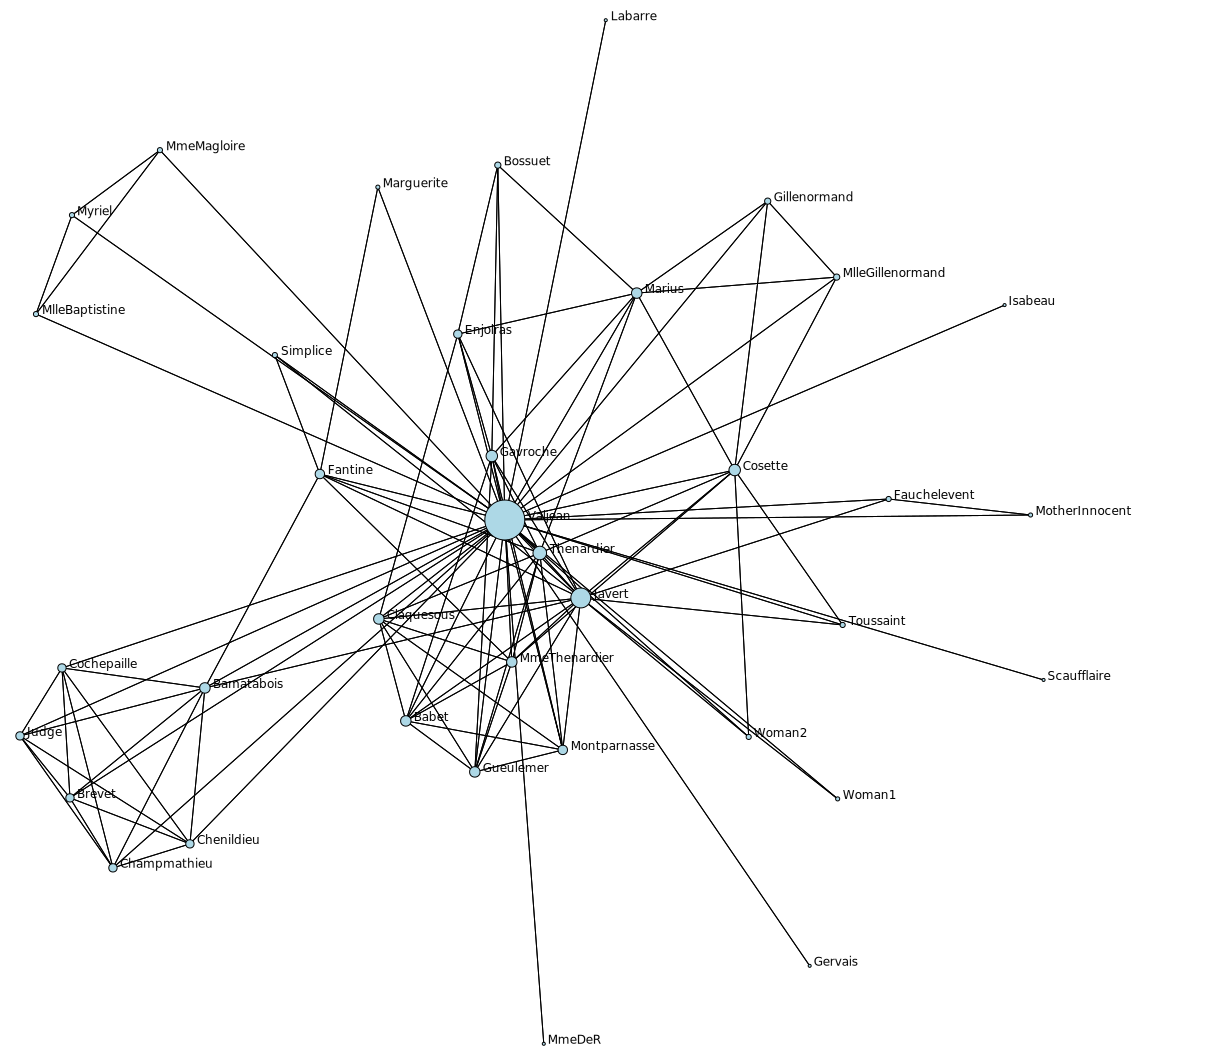

In [31]:
ego_4 = nx.ego_graph(G, 'Valjean') 

draw_graph(ego_4, font_size=12, show_names=True, node_size=4, edge_width=1) 

['Mabeuf' 'Bahorel' 'Combeferre' 'Prouvaire' 'Marius' 'Feuilly' 'Gavroche'
 'Courfeyrac' 'Bossuet' 'MmeHucheloup' 'Grantaire' 'Enjolras' 'Joly']


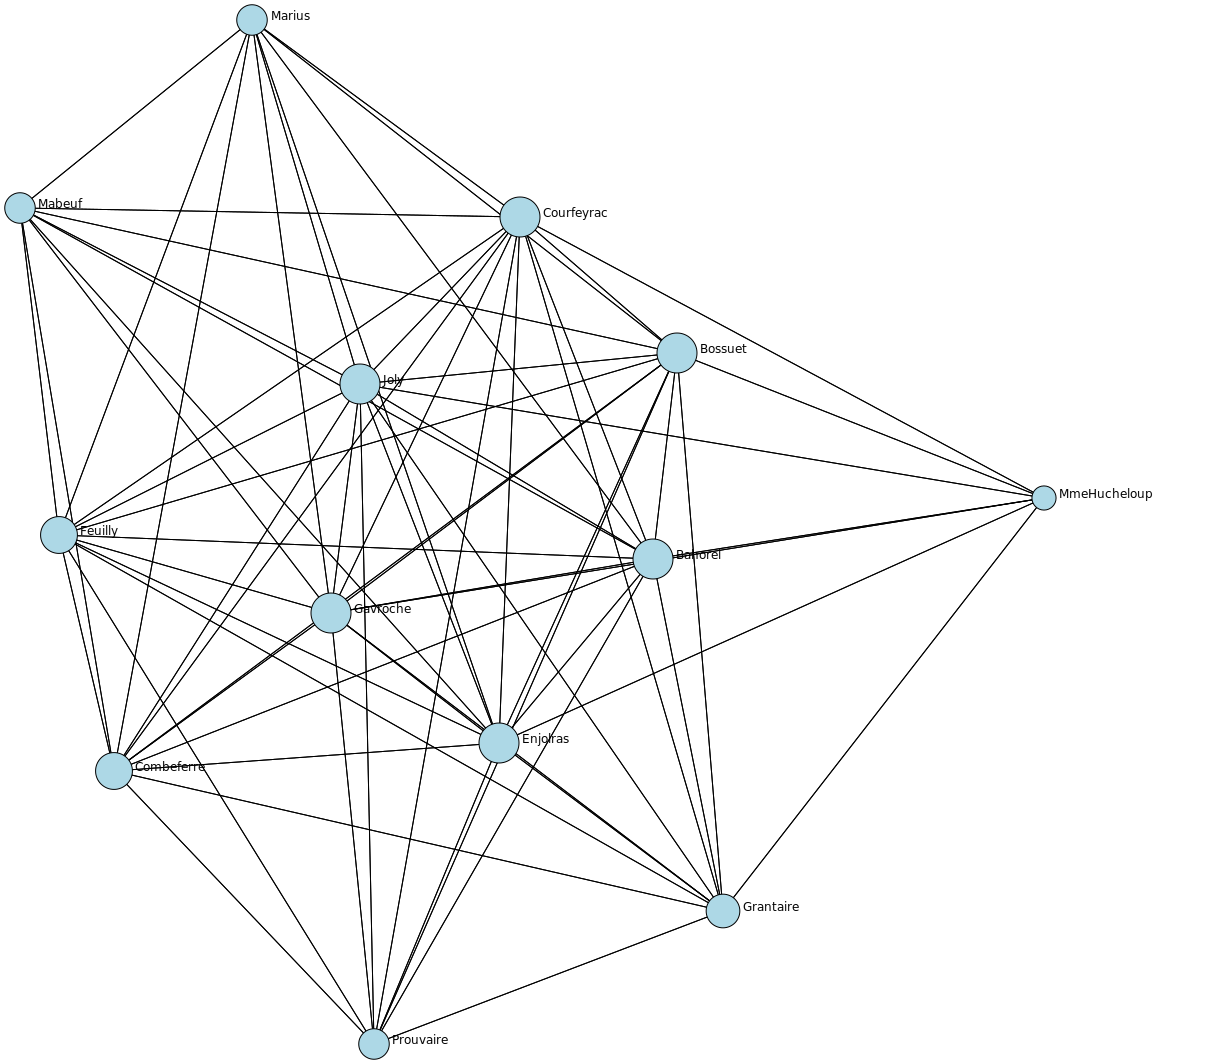

In [32]:
ego_4 = nx.ego_graph(G, 'Joly') 

draw_graph(ego_4, font_size=12, show_names=True, node_size=4, edge_width=1) 

['Mabeuf' 'Bahorel' 'Combeferre' 'Prouvaire' 'Marius' 'Feuilly' 'Gavroche'
 'Courfeyrac' 'Bossuet' 'MmeHucheloup' 'Grantaire' 'Enjolras']


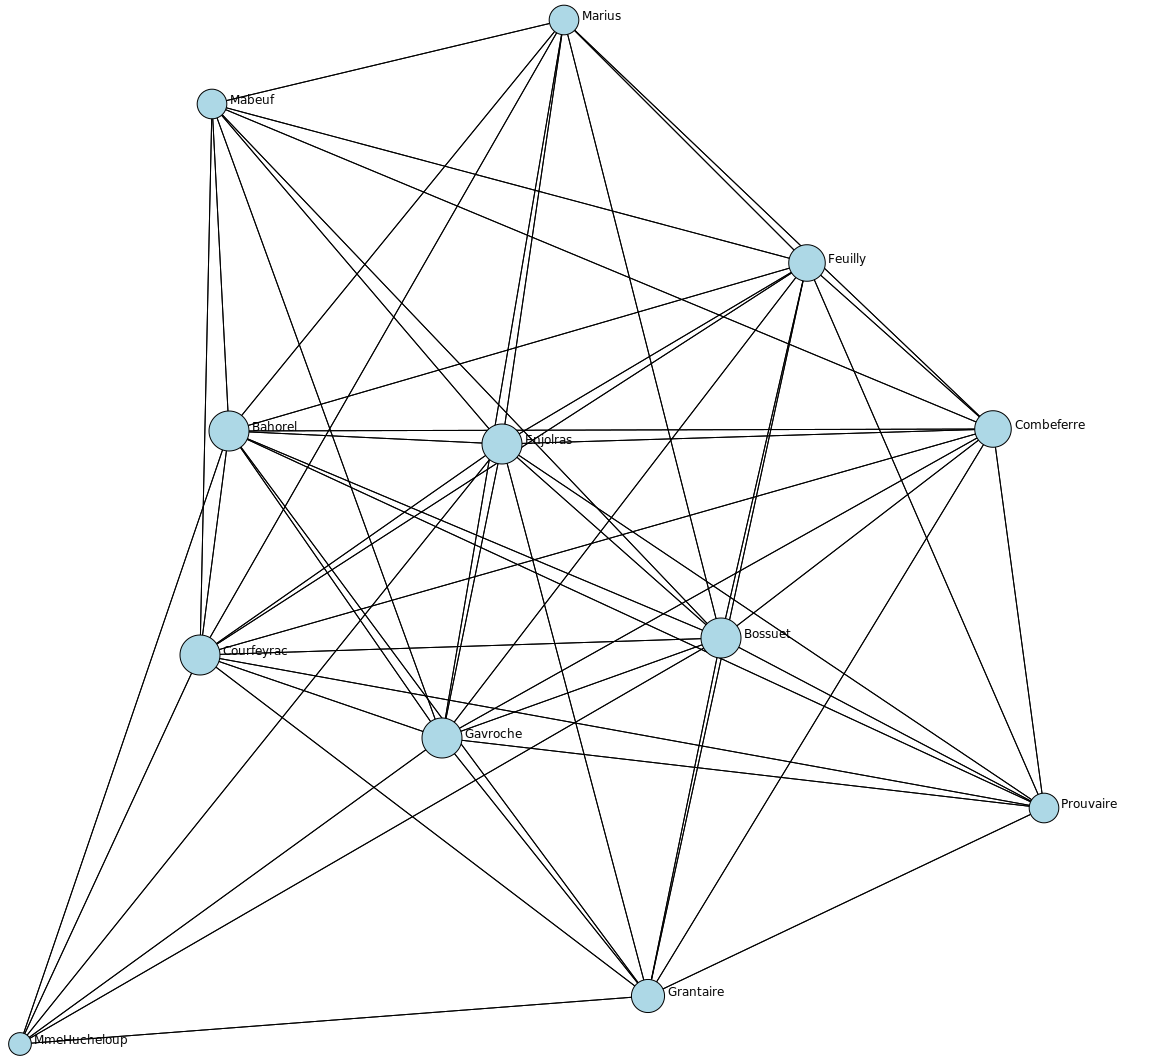

In [33]:
ego_4 = nx.ego_graph(G, 'Joly', center=False) 

draw_graph(ego_4, font_size=12, show_names=True, node_size=4, edge_width=1) 

In [34]:
sorted(ego_4.nodes) 

['Bahorel',
 'Bossuet',
 'Combeferre',
 'Courfeyrac',
 'Enjolras',
 'Feuilly',
 'Gavroche',
 'Grantaire',
 'Mabeuf',
 'Marius',
 'MmeHucheloup',
 'Prouvaire']

In [35]:
print(ego_4) 

Graph with 12 nodes and 57 edges


In [36]:
degcent = nx.degree_centrality(ego_4) 
degcent_df = pd.DataFrame(degcent, index=[0]).T 
degcent_df.columns = ['degree_centrality'] 
degcent_df.sort_values( 'degree_centrality', inplace=True, ascending=False) 
degcent_df.head(10) 

,degree_centrality
Bahorel,1.000000
Gavroche,1.000000
Courfeyrac,1.000000
Bossuet,1.000000
Enjolras,1.000000
Combeferre,0.909091
Feuilly,0.909091
Grantaire,0.818182
Mabeuf,0.727273
Prouvaire,0.727273


In [37]:
nx.density(ego_4) 

0.8636363636363636